# 处理无标签数据 - 聚类分析

- 使用流行的k-means算法寻找相似性中心
- 使用自下而上的方法构建分层集群树
- 使用基于密度的聚类方法识别任意形状的对象

## 使用k-means以相似性分组对象

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)


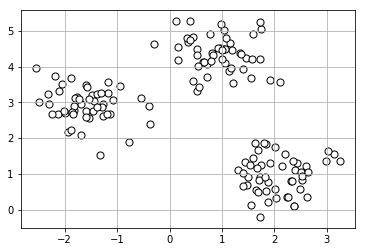

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', s=50, edgecolors='black')
plt.grid()
plt.show()


k-means 4步骤

1. 从样本点中随机选取k个点作为起始聚类中心
2. 分配每个样本距离最近的中心
3. 将中心点移动到所有属于该中心的样本的中心
4. 重复2和3,直到聚类分配不再改变,或达到用户容忍的范围,或达到最大遍历次数. 

In [7]:
from sklearn.cluster import KMeans
# n_init=10 mean that run the k-means clustering algorithms 10 times independently with different random
# centroids to choose the final model as the one with the lowest SSE.
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)


### K-means++

[definition and more details see this.](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

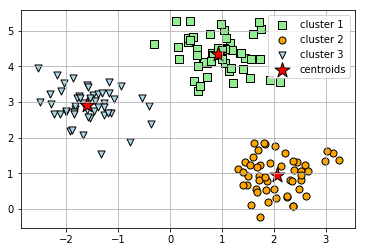

In [9]:
# 可视化
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolors='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolors='black', marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', edgecolors='black', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolors='black', label='centroids')
plt.legend()
plt.grid()


### 硬聚类 vs 软聚类

FCM是一种软聚类方法,和k-means有些类似,但是没有在sklearn中实现,不过实践发现,FCM和k-means的效果差不多.

见[Comparative Analysis of k-means and Fuzzy c-means Algorithms](https://www.researchgate.net/publication/270953555_Comparative_Analysis_of_K-Means_and_Fuzzy_C-Means_Algorithms)

### 使用elbow方法找到最佳的聚类数

In [11]:
# SSE
print('Distortion: {:.2f}'.format(km.inertia_))


Distortion: 72.48


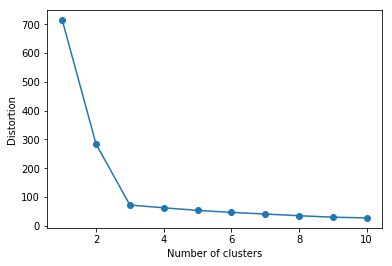

In [12]:
# 画出elbow方法画出k的大小与SSE(distortion)的关系
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


可以看出k=3是个好的选择

### 通过silhouette图来量化聚类的性能

In [13]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)


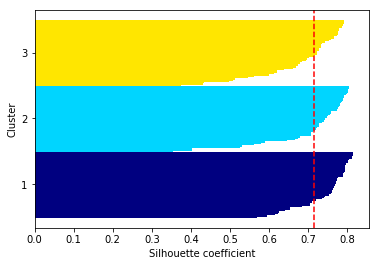

In [15]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silouette_avg = np.mean(silouette_vals)
plt.axvline(silouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


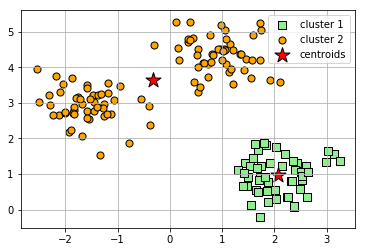

In [17]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolors='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolors='black', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250,
            marker='*', c='red', edgecolors='black', label='centroids')
plt.legend()
plt.grid()


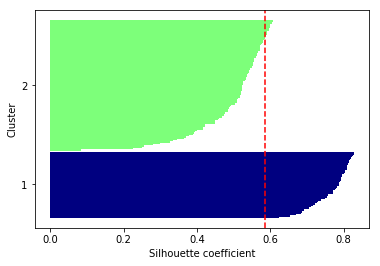

In [18]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silouette_avg = np.mean(silouette_vals)
plt.axvline(silouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## 将群集组织为分层树

- Compute the distance matrix of all samples.
- Represent each data point as a singleton cluster.
- Merge the two closest clusters based on the distance of the most dissimilar(distant) members.
- Update the distance matrix.
- Repeat steps 2 to 4 until one single cluster remains.

In [20]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 在距离矩阵上实施分层聚类

In [22]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000
